In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from keras.models import Sequential,load_model,Model
from keras.layers import Conv2D,MaxPool2D,Dense,Dropout,BatchNormalization,Flatten,Input
from sklearn.model_selection import train_test_split

In [2]:
path = "data/UTKFace"
images = []
gender = []
for img in os.listdir(path):
  genders = img.split("_")[1]
  img = cv2.imread(str(path)+"/"+str(img))
  img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  images.append(np.array(img))
  gender.append(np.array(genders))

In [3]:
images = np.array(images)   
gender = np.array(gender,np.uint64)

In [4]:
x_train_gender, x_test_gender, y_train_gender, y_test_gender = train_test_split(images, gender, random_state=42)

In [5]:
gender_model = Sequential()

gender_model.add(Conv2D(36, kernel_size=3, activation='relu', input_shape=(200,200,3)))

gender_model.add(MaxPool2D(pool_size=3, strides=2))
gender_model.add(Conv2D(64, kernel_size=3, activation='relu'))
gender_model.add(MaxPool2D(pool_size=3, strides=2))

gender_model.add(Conv2D(128, kernel_size=3, activation='relu'))
gender_model.add(MaxPool2D(pool_size=3, strides=2))

gender_model.add(Conv2D(256, kernel_size=3, activation='relu'))
gender_model.add(MaxPool2D(pool_size=3, strides=2))

gender_model.add(Conv2D(512, kernel_size=3, activation='relu'))
gender_model.add(MaxPool2D(pool_size=3, strides=2))

gender_model.add(Flatten())
gender_model.add(Dropout(0.2))
gender_model.add(Dense(512, activation='relu'))
gender_model.add(Dense(1, activation='sigmoid', name='gender'))

gender_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_gender = gender_model.fit(x_train_gender, y_train_gender,
                        validation_data=(x_test_gender, y_test_gender), epochs=50)

gender_model.save('gender_model_50epochs.h5')

Epoch 1/50
556/556 [==============================] - 597s 1s/step - loss: 0.8898 - accuracy: 0.7037 - val_loss: 0.4490 - val_accuracy: 0.7943
Epoch 2/50
556/556 [==============================] - 594s 1s/step - loss: 0.4330 - accuracy: 0.8037 - val_loss: 0.4372 - val_accuracy: 0.7943
Epoch 3/50
556/556 [==============================] - 602s 1s/step - loss: 0.3931 - accuracy: 0.8235 - val_loss: 0.4190 - val_accuracy: 0.7969
Epoch 4/50
556/556 [==============================] - 602s 1s/step - loss: 0.3519 - accuracy: 0.8441 - val_loss: 0.3792 - val_accuracy: 0.8164
Epoch 5/50
556/556 [==============================] - 603s 1s/step - loss: 0.3408 - accuracy: 0.8443 - val_loss: 0.3813 - val_accuracy: 0.8249
Epoch 6/50
556/556 [==============================] - 602s 1s/step - loss: 0.3238 - accuracy: 0.8541 - val_loss: 0.3321 - val_accuracy: 0.8473
Epoch 7/50
556/556 [==============================] - 604s 1s/step - loss: 0.3124 - accuracy: 0.8604 - val_loss: 0.3014 - val_accuracy: 0.8623

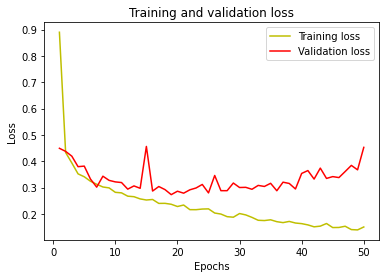

In [8]:
#plot the training and validation accuracy and loss at each epoch
history = history_gender
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [9]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

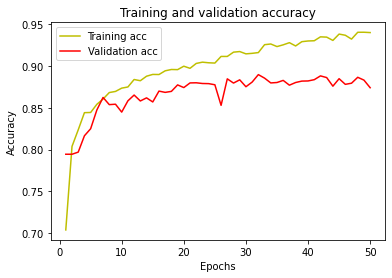

In [10]:
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [11]:
from keras.models import load_model
#Test the model
my_model = load_model('gender_model_50epochs.h5', compile=False)
predictions = my_model.predict(x_test_gender)
y_pred = (predictions>= 0.5).astype(int)[:,0]

186/186 [==============================] - 41s 219ms/step


In [12]:
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(y_test_gender, y_pred))

Accuracy =  0.8739665935549181


<AxesSubplot:>

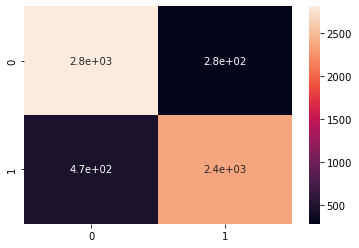

In [13]:
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm=confusion_matrix(y_test_gender, y_pred)  
sns.heatmap(cm, annot=True)